In [5]:
import pandas as pd

# Carregar o dataset de pedidos
pedidos = pd.read_csv('/Users/victorsabino36/Desktop/archive/olist_orders_dataset.csv')

# Visualizar as 5 primeiras linhas do dataset
pedidos.head(3)




,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [9]:
print(pedidos.dtypes)


order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


In [15]:
# Convertendo as colunas de data para datetime
pedidos['order_purchase_timestamp'] = pd.to_datetime(pedidos['order_purchase_timestamp'])
pedidos['order_approved_at'] = pd.to_datetime(pedidos['order_approved_at'])
pedidos['order_delivered_carrier_date'] = pd.to_datetime(pedidos['order_delivered_carrier_date'])
pedidos['order_delivered_customer_date'] = pd.to_datetime(pedidos['order_delivered_customer_date'])
pedidos['order_estimated_delivery_date'] = pd.to_datetime(pedidos['order_estimated_delivery_date'])

# Verificando os tipos novamente
print(pedidos.dtypes)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


In [17]:
# Exibe informações gerais sobre o DataFrame
print(pedidos.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
None


In [19]:
# remover valores ausentes
pedidos.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)


In [59]:
# Adicionando a coluna 'delivery_duration' ao DataFrame
pedidos['delivery_duration'] = pedidos['order_delivered_customer_date'] - pedidos['order_purchase_timestamp']

# Convertendo para o número de dias 
pedidos['delivery_duration'] = pedidos['delivery_duration'].dt.days

# Salvando o DataFrame modificado em um novo arquivo CSV
pedidos.to_csv('olist_orders_dataset_with_delivery_duration.csv', index=False)


In [55]:
# Estatísticas descritivas do prazo de entrega
delivery_stats = pedidos['delivery_duration'].describe()
print(delivery_stats)


count    96461.000000
mean        12.093582
std          9.551576
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_duration, dtype: float64


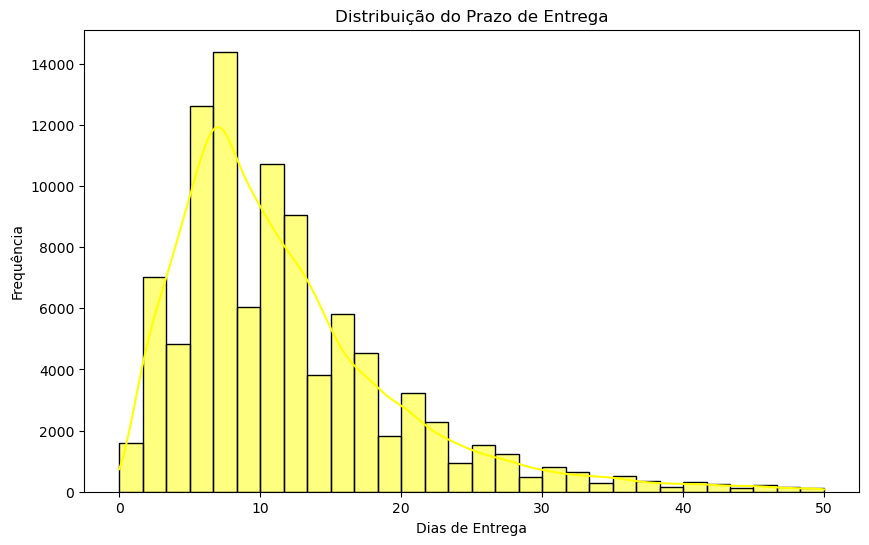

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo um limite para o prazo de entrega
pedidos_filtered = pedidos[pedidos['delivery_duration'] <= 50]

# Plotando o histograma novamente com os dados filtrados
plt.figure(figsize=(10,6))
sns.histplot(pedidos_filtered['delivery_duration'], kde=True, color='yellow', bins=30)
plt.title('Distribuição do Prazo de Entrega')
plt.xlabel('Dias de Entrega')
plt.ylabel('Frequência')
plt.show()


In [107]:
pedidos['delayed'] = pedidos['order_delivered_customer_date'] > pedidos['order_estimated_delivery_date']

# Número total de pedidos atrasados
num_atrasados = pedidos['delayed'].sum()

# Percentual de pedidos atrasados
percent_atrasados = (num_atrasados / len(pedidos)) * 100

print(f"Total de pedidos atrasados: {num_atrasados}")
print(f"Percentual de pedidos atrasados: {percent_atrasados:.2f}%")


Total de pedidos atrasados: 7826
Percentual de pedidos atrasados: 8.11%


In [129]:
# Criar uma nova coluna para a duração dos atrasos de forma segura
pedidos_atrasados = pedidos[pedidos['delayed']].copy()  # Fazemos uma cópia explícita
pedidos_atrasados['delay_days'] = (pedidos_atrasados['order_delivered_customer_date'] - pedidos_atrasados['order_estimated_delivery_date']).dt.days

# Calcular a duração média dos atrasos
media_atraso = pedidos_atrasados['delay_days'].mean()
print(f"Duração média dos atrasos: {media_atraso:.2f} dias")


Duração média dos atrasos: 8.87 dias


In [181]:
# Criar uma coluna de mês
pedidos['month'] = pedidos['order_purchase_timestamp'].dt.month

# Agrupar por mês e calcular a taxa de atrasos
atrasos_por_mes = pedidos.groupby('month')['delayed'].mean() * 100
print(atrasos_por_mes)


month
1      6.230012
2     13.443943
3     17.153629
4      5.955390
5      6.644647
6      2.209945
7      4.078580
8      7.577769
9      5.204819
10     5.054760
11    14.311196
12     8.378672
Name: delayed, dtype: float64


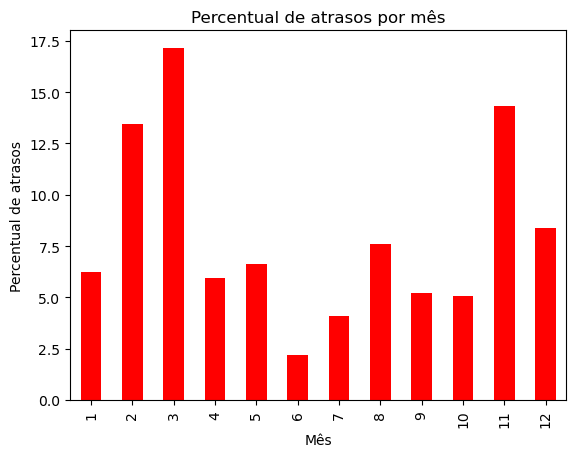

In [187]:
import matplotlib.pyplot as plt

# gráfico de atrasos por mês
atrasos_por_mes.plot(kind='bar', color='red', title='Percentual de atrasos por mês')
plt.ylabel('Percentual de atrasos')
plt.xlabel('Mês')
plt.show()

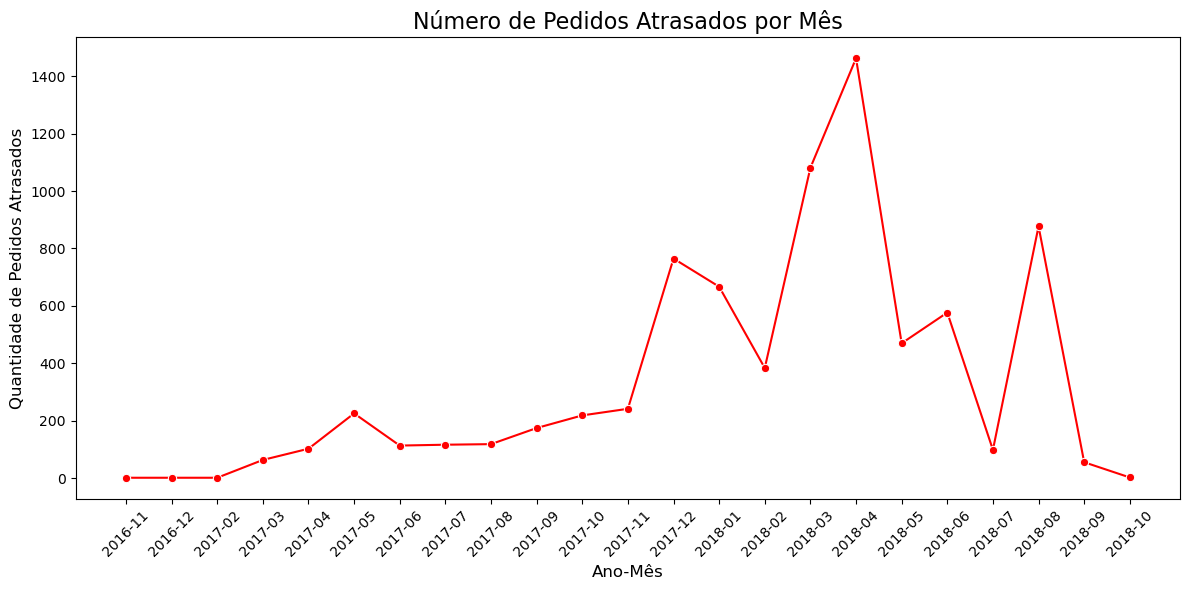

In [167]:
# Criar uma coluna para o ano e mês do atraso
pedidos_atrasados['year_month'] = pedidos_atrasados['order_delivered_customer_date'].dt.to_period('M')

# Contar o número de pedidos atrasados por mês e ano
atrasos_por_mes = pedidos_atrasados.groupby('year_month').size()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=atrasos_por_mes.index.astype(str), y=atrasos_por_mes.values, marker='o', color='red')

# Títulos e rótulos
plt.title('Número de Pedidos Atrasados por Mês', fontsize=16)
plt.xlabel('Ano-Mês', fontsize=12)
plt.ylabel('Quantidade de Pedidos Atrasados', fontsize=12)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização

plt.tight_layout()
plt.show()

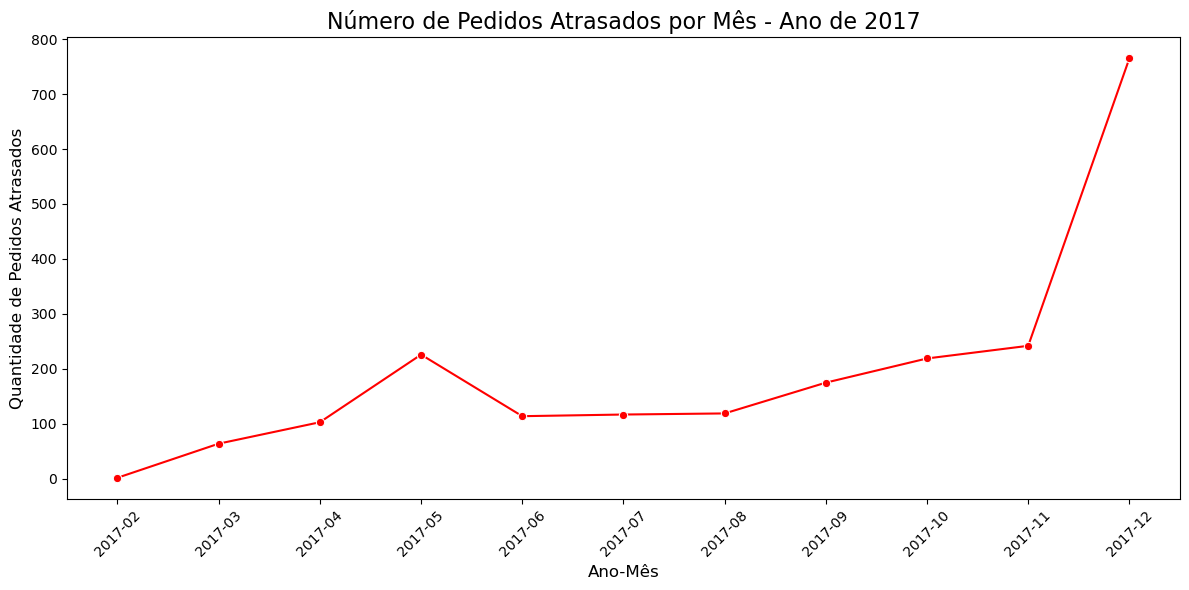

In [171]:
# Filtrar os dados para o ano de 2018
pedidos_atrasados_2017 = pedidos_atrasados[pedidos_atrasados['order_delivered_customer_date'].dt.year == 2017].copy()

# Criar a coluna de ano-mês de forma segura
pedidos_atrasados_2017.loc[:, 'year_month'] = pedidos_atrasados_2017['order_delivered_customer_date'].dt.to_period('M')

# Contar o número de pedidos atrasados por mês de 2018
atrasos_por_mes_2017 = pedidos_atrasados_2017.groupby('year_month').size()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=atrasos_por_mes_2017.index.astype(str), y=atrasos_por_mes_2017.values, marker='o', color='red')

# Títulos e rótulos
plt.title('Número de Pedidos Atrasados por Mês - Ano de 2017', fontsize=16)
plt.xlabel('Ano-Mês', fontsize=12)
plt.ylabel('Quantidade de Pedidos Atrasados', fontsize=12)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização

plt.tight_layout()
plt.show()


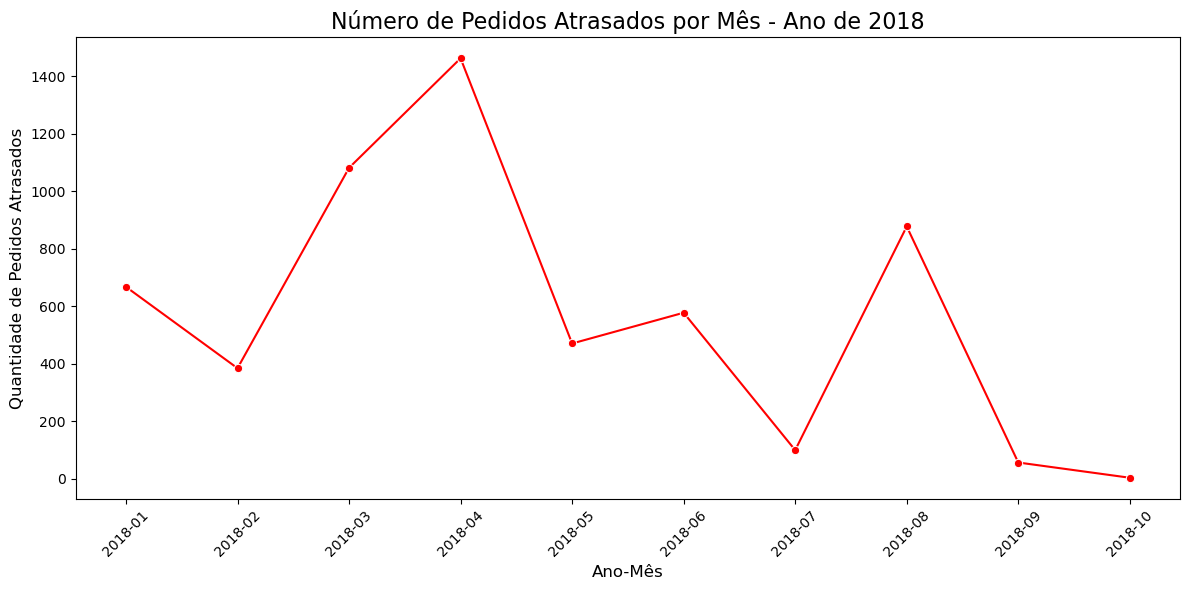

In [169]:
# Filtrar os dados para o ano de 2018
pedidos_atrasados_2018 = pedidos_atrasados[pedidos_atrasados['order_delivered_customer_date'].dt.year == 2018].copy()

# Criar a coluna de ano-mês de forma segura
pedidos_atrasados_2018.loc[:, 'year_month'] = pedidos_atrasados_2018['order_delivered_customer_date'].dt.to_period('M')

# Contar o número de pedidos atrasados por mês de 2018
atrasos_por_mes_2018 = pedidos_atrasados_2018.groupby('year_month').size()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=atrasos_por_mes_2018.index.astype(str), y=atrasos_por_mes_2018.values, marker='o', color='red')

# Títulos e rótulos
plt.title('Número de Pedidos Atrasados por Mês - Ano de 2018', fontsize=16)
plt.xlabel('Ano-Mês', fontsize=12)
plt.ylabel('Quantidade de Pedidos Atrasados', fontsize=12)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização

plt.tight_layout()
plt.show()


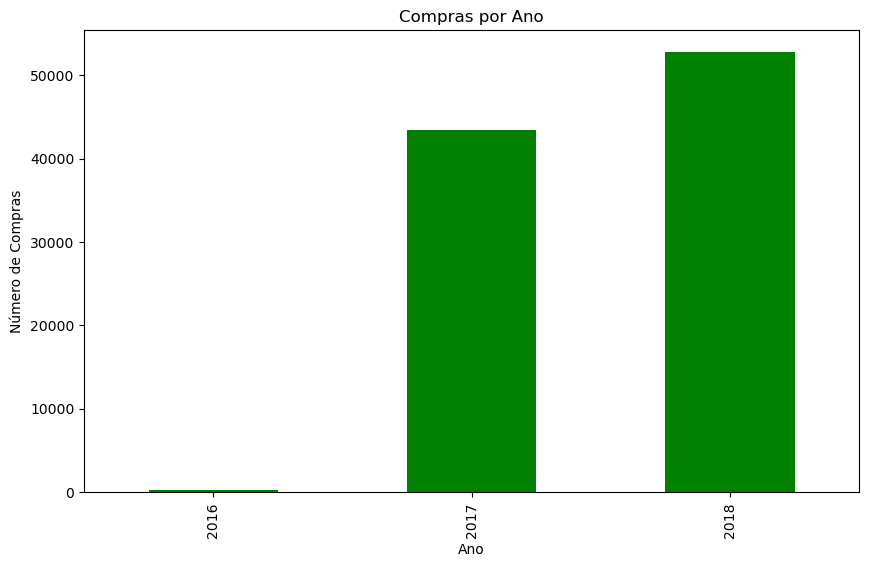

In [189]:
# Extraindo o ano
pedidos['year'] = pedidos['order_purchase_timestamp'].dt.year

# Contando as compras por ano
yearly_purchases = pedidos['year'].value_counts().sort_index()

# Plotando
yearly_purchases.plot(kind='bar', figsize=(10,6), title="Compras por Ano", color='green')
plt.xlabel('Ano')
plt.ylabel('Número de Compras')
plt.show()


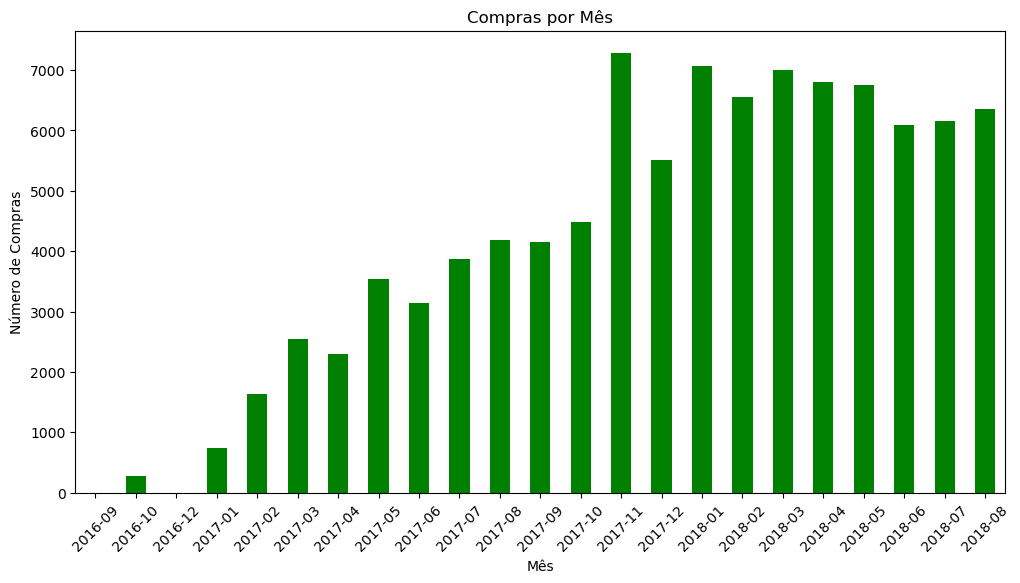

In [191]:
# Extraindo o mês e o ano para análise
pedidos['year_month'] = pedidos['order_purchase_timestamp'].dt.to_period('M')

# Contando o número de compras por mês
monthly_purchases = pedidos['year_month'].value_counts().sort_index()

# Plotando
monthly_purchases.plot(kind='bar', figsize=(12,6), title="Compras por Mês", color='green')
plt.xlabel('Mês')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)
plt.show()

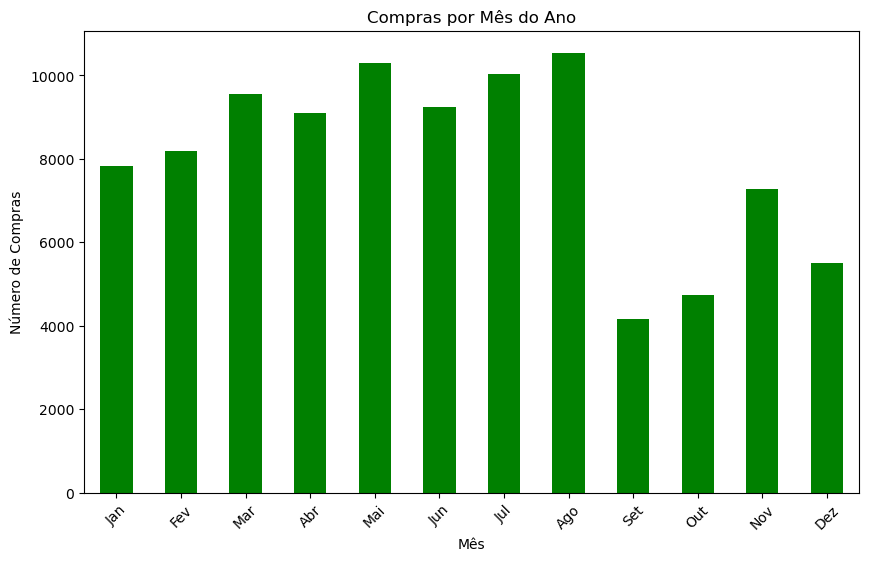

In [97]:
# Extraindo o mês
pedidos['month'] = pedidos['order_purchase_timestamp'].dt.month

# Contando as compras por mês
monthly_purchases = pedidos['month'].value_counts().sort_index()

# Plotando
monthly_purchases.plot(kind='bar', color='green', figsize=(10,6), title="Compras por Mês do Ano")
plt.xlabel('Mês')
plt.ylabel('Número de Compras')
plt.xticks(ticks=range(12), labels=["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"], rotation=45)
plt.show()


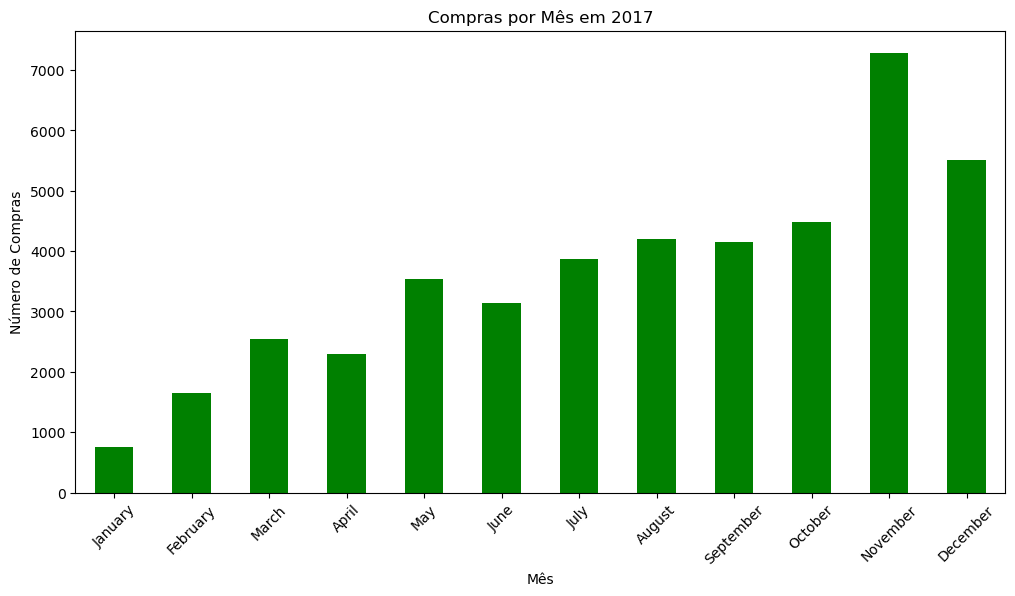

In [79]:
# Filtrando apenas os dados de 2017
pedidos_2017 = pedidos[pedidos['order_purchase_timestamp'].dt.year == 2017].copy()

# Extraindo o nome do mês e criando a nova coluna
pedidos_2017['month_name'] = pedidos_2017['order_purchase_timestamp'].dt.month_name()

# Ordenando os meses corretamente
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pedidos_2017['month_name'] = pd.Categorical(pedidos_2017['month_name'], categories=ordered_months, ordered=True)

# Contando o número de compras por mês
monthly_purchases = pedidos_2017['month_name'].value_counts().sort_index()

# Plotando
monthly_purchases = monthly_purchases.sort_index()  # Garantir a ordenação

monthly_purchases.plot(kind='bar', color='green', figsize=(12,6), title="Compras por Mês em 2017")
plt.xlabel('Mês')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)
plt.show()

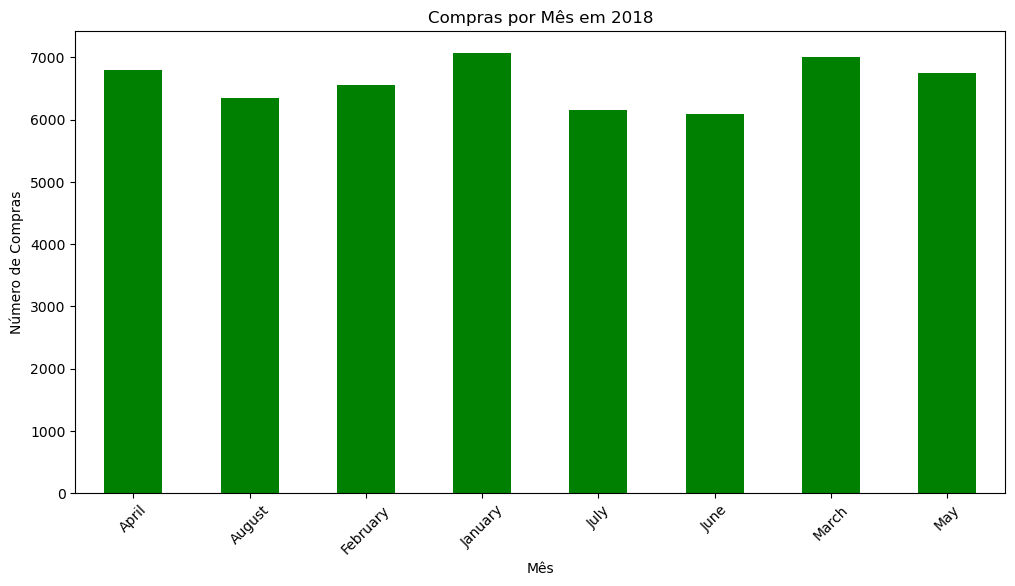

In [85]:
# Filtrando apenas os dados de 2018
pedidos_2018 = pedidos[pedidos['order_purchase_timestamp'].dt.year == 2018].copy()

# Extraindo o nome do mês e criando a nova coluna
pedidos_2018['month_name'] = pedidos_2017['order_purchase_timestamp'].dt.month_name()

# Ordenando os meses corretamente
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
pedidos_2017['month_name'] = pd.Categorical(pedidos_2018['month_name'], categories=ordered_months, ordered=True)

# Contando o número de compras por mês
monthly_purchases = pedidos_2018['month_name'].value_counts().sort_index()

# Plotando
monthly_purchases = monthly_purchases.sort_index()  # Garantir a ordenação

monthly_purchases.plot(kind='bar', color='green', figsize=(12,6), title="Compras por Mês em 2018")
plt.xlabel('Mês')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)
plt.show()

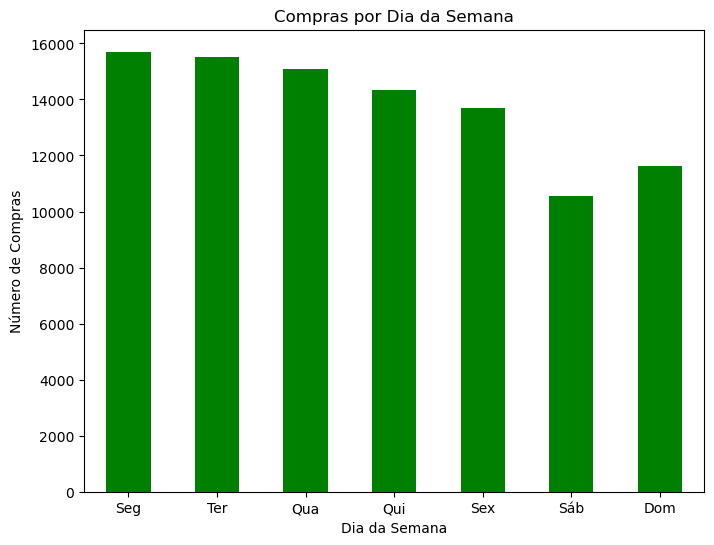

In [93]:
# Extraindo o dia da semana (0 = segunda-feira, 6 = domingo)
pedidos['day_of_week'] = pedidos['order_purchase_timestamp'].dt.dayofweek

# Contando as compras por dia da semana
day_of_week_purchases = pedidos['day_of_week'].value_counts().sort_index()

# Plotando
day_of_week_purchases.plot(kind='bar', color='green', figsize=(8,6), title="Compras por Dia da Semana")
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Compras')
plt.xticks(ticks=range(7), labels=["Seg", "Ter", "Qua", "Qui", "Sex", "Sáb", "Dom"], rotation=0)
plt.show()


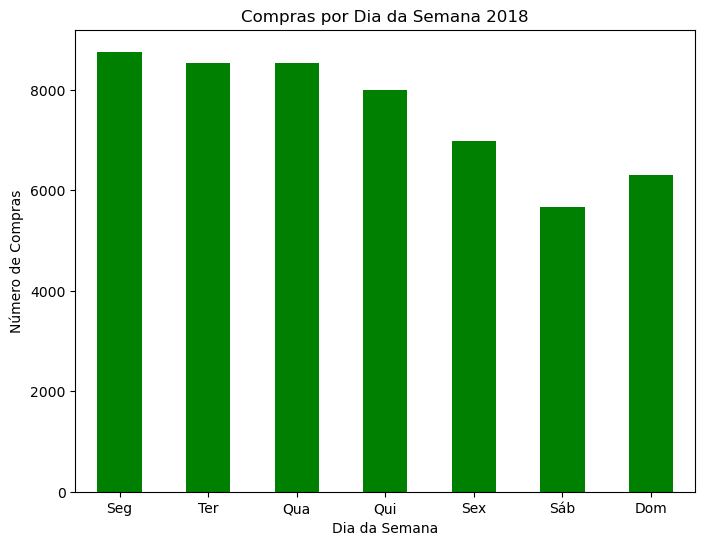

In [145]:
# Extraindo o dia da semana (0 = segunda-feira, 6 = domingo)

pedidos_2018 = pedidos[pedidos['order_purchase_timestamp'].dt.year == 2018].copy()

pedidos_2018['day_of_week'] = pedidos_2018['order_purchase_timestamp'].dt.dayofweek

# Contando as compras por dia da semana
day_of_week_purchases = pedidos_2018['day_of_week'].value_counts().sort_index()

# Plotando
day_of_week_purchases.plot(kind='bar', color='green', figsize=(8,6), title="Compras por Dia da Semana 2018")
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Compras')
plt.xticks(ticks=range(7), labels=["Seg", "Ter", "Qua", "Qui", "Sex", "Sáb", "Dom"], rotation=0)
plt.show()


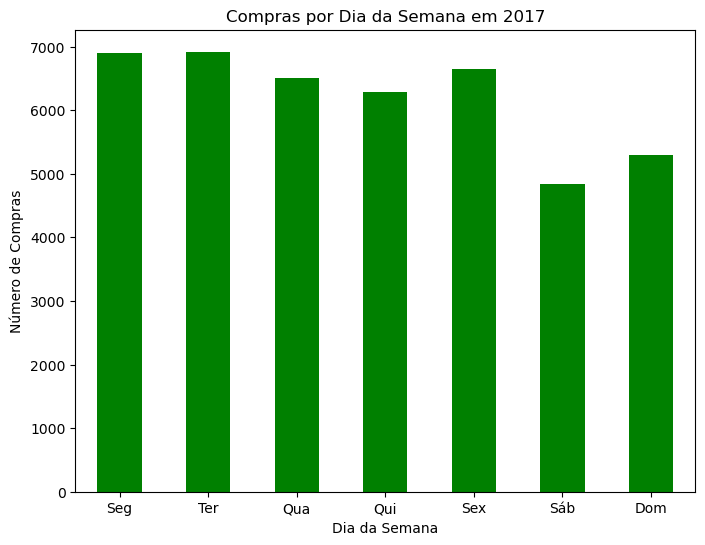

In [141]:
# Extraindo o dia da semana (0 = segunda-feira, 6 = domingo)

pedidos_2017 = pedidos[pedidos['order_purchase_timestamp'].dt.year == 2017].copy()

pedidos_2017['day_of_week'] = pedidos_2017['order_purchase_timestamp'].dt.dayofweek

# Contando as compras por dia da semana
day_of_week_purchases = pedidos_2017['day_of_week'].value_counts().sort_index()

# Plotando
day_of_week_purchases.plot(kind='bar', color='green', figsize=(8,6), title="Compras por Dia da Semana em 2017")
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Compras')
plt.xticks(ticks=range(7), labels=["Seg", "Ter", "Qua", "Qui", "Sex", "Sáb", "Dom"], rotation=0)
plt.show()


In [325]:
import pandas as pd

# Carregar os datasets
customers = pd.read_csv('/Users/victorsabino36/Desktop/archive/olist_customers_dataset.csv')
orders = pd.read_csv('/Users/victorsabino36/Desktop/archive/olist_orders_dataset.csv')
payments = pd.read_csv('/Users/victorsabino36/Desktop/archive/olist_order_payments_dataset.csv')
sallers_itens = pd.read_csv('/Users/victorsabino36/Desktop/archive/olist_sellers_dataset.csv')



In [197]:
# Juntar os datasets para entender a geolocalização dos clientes
customer_orders = pd.merge(customers, orders, on='customer_id', how='inner')

# Visualizar as colunas resultantes
print(customer_orders.head())


                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:0

In [199]:
# Contagem de pedidos por estado
pedidos_por_estado = customer_orders['customer_state'].value_counts()

# Contagem de pedidos por cidade
pedidos_por_cidade = customer_orders['customer_city'].value_counts()

# Visualizar os 10 estados e cidades com mais pedidos
print("Pedidos por estado:")
print(pedidos_por_estado.head(10))

print("\nPedidos por cidade:")
print(pedidos_por_cidade.head(10))


Pedidos por estado:
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: count, dtype: int64

Pedidos por cidade:
customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64


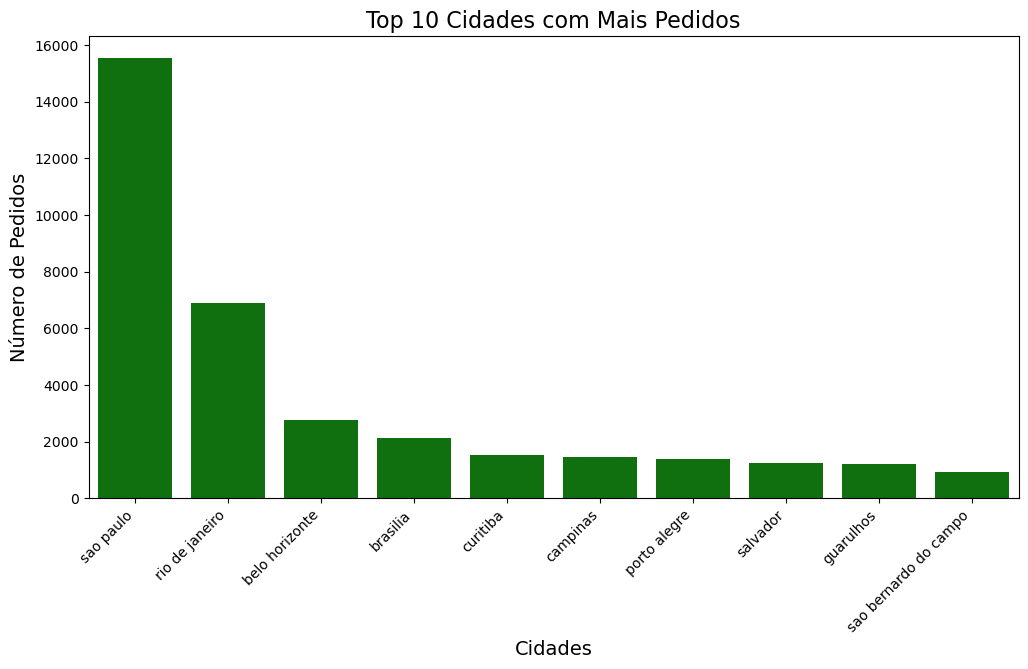

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrando as 10 cidades com mais pedidos
top_cities = pedidos_por_cidade.head(10)

# Plotando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(y=top_cities.values, x=top_cities.index, color='green')

# Personalizando o gráfico
plt.title('Top 10 Cidades com Mais Pedidos', fontsize=16)
plt.ylabel('Número de Pedidos', fontsize=14)
plt.xlabel('Cidades', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()


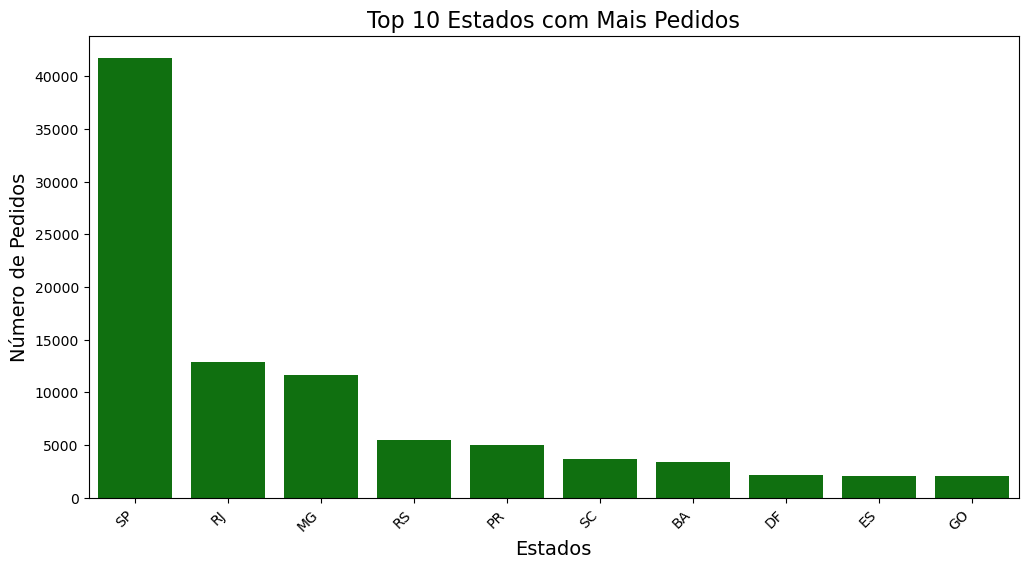

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrando as 10 cidades com mais pedidos
top_states = pedidos_por_estado.head(10)

# Plotando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(y=top_states.values, x=top_states.index, color='green')

# Personalizando o gráfico
plt.title('Top 10 Estados com Mais Pedidos', fontsize=16)
plt.ylabel('Número de Pedidos', fontsize=14)
plt.xlabel('Estados', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()


                       avg_delivery_time  order_count
customer_city                                        
guarulhos                       7.536308         1189
sao paulo                       7.604014        15540
sao bernardo do campo           7.635565          938
campinas                        9.357041         1444
curitiba                       10.015447         1521
belo horizonte                 10.658509         2773
brasilia                       12.511347         2131
rio de janeiro                 14.306632         6882
porto alegre                   15.519016         1379
salvador                       18.879630         1245


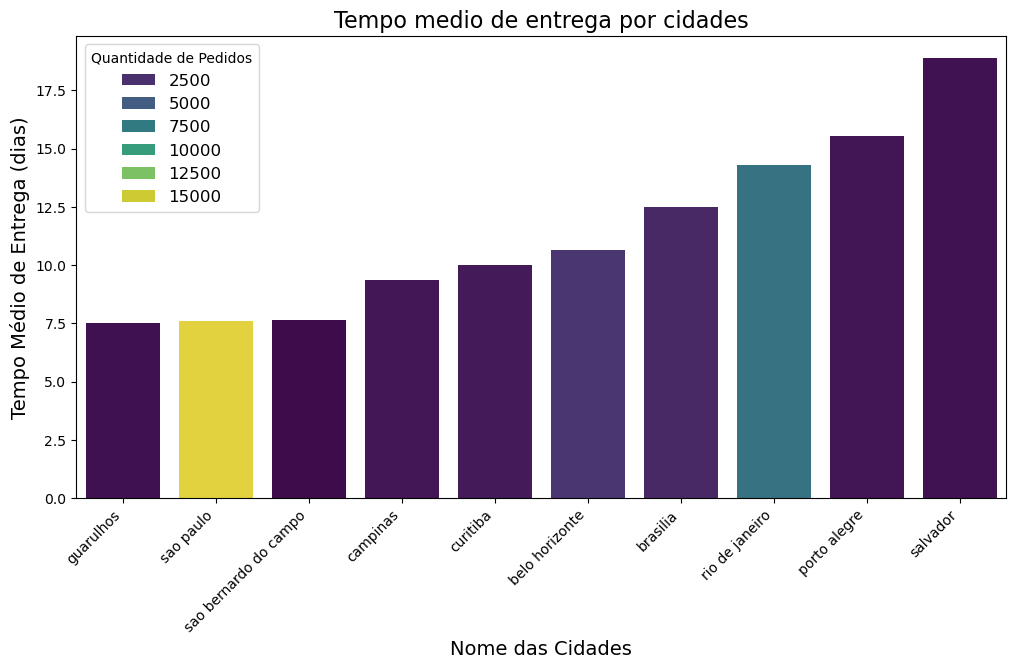

In [279]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converter as colunas de datas para o formato datetime
customer_orders['order_purchase_timestamp'] = pd.to_datetime(customer_orders['order_purchase_timestamp'])
customer_orders['order_delivered_customer_date'] = pd.to_datetime(customer_orders['order_delivered_customer_date'])

# Calcular o tempo de entrega (em dias)
customer_orders['delivery_time'] = (customer_orders['order_delivered_customer_date'] - customer_orders['order_purchase_timestamp']).dt.days

# Contar as 10 cidades com mais pedidos
top_10_cities = customer_orders['customer_city'].value_counts().head(10).index

# Filtrar os dados para as 10 cidades com mais pedidos
top_10_city_orders = customer_orders[customer_orders['customer_city'].isin(top_10_cities)]

# Calcular a média do tempo de entrega e a quantidade de pedidos por cidade
avg_delivery_time_by_city = top_10_city_orders.groupby('customer_city').agg(
    avg_delivery_time=('delivery_time', 'mean'),
    order_count=('customer_city', 'size')
)

# Ordenar os resultados por quantidade de pedidos em ordem crescente
avg_delivery_time_by_city_sorted = avg_delivery_time_by_city.sort_values(by='avg_delivery_time', ascending=True)

# Exibir os resultados ordenados
print(avg_delivery_time_by_city_sorted)


# Resetar índice para usar as colunas explicitamente
avg_delivery_time_by_city_sorted = avg_delivery_time_by_city_sorted.reset_index()

# Criar gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    x='customer_city', 
    y='avg_delivery_time', 
    data=avg_delivery_time_by_city_sorted, 
    palette='viridis', 
    hue='order_count',)

plt.title('Tempo medio de entrega por cidades', fontsize=16)
plt.xlabel("Nome das Cidades", fontsize=14)  # Renomeia o eixo X
plt.ylabel("Tempo Médio de Entrega (dias)", fontsize=14)  # Renomeia o eixo Y
plt.legend(title="Quantidade de Pedidos", fontsize=12)  # Renomeia o título da legenda
plt.xticks(rotation=45, ha='right');  # Rotaciona os rótulos

                avg_delivery_time  order_count
customer_state                                
SP                       8.298061        41746
PR                      11.526711         5045
MG                      11.543813        11635
DF                      12.509135         2140
SC                      14.479560         3637
RS                      14.819237         5466
RJ                      14.849186        12852
GO                      15.150741         2020
ES                      15.331830         2033
BA                      18.866400         3380


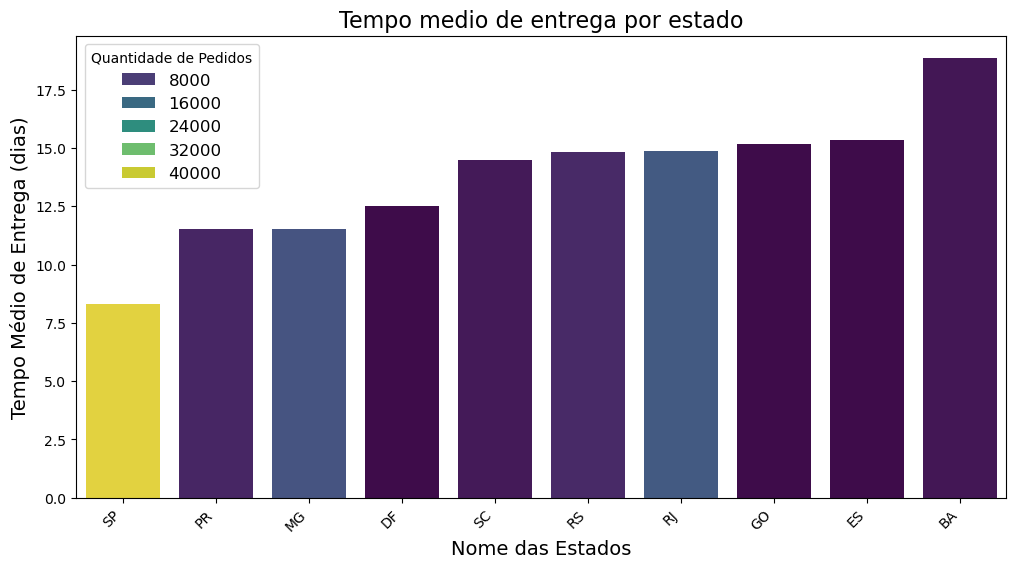

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns

# Converter as colunas de datas para o formato datetime
customer_orders['order_purchase_timestamp'] = pd.to_datetime(customer_orders['order_purchase_timestamp'])
customer_orders['order_delivered_customer_date'] = pd.to_datetime(customer_orders['order_delivered_customer_date'])

# Calcular o tempo de entrega (em dias)
customer_orders['delivery_time'] = (customer_orders['order_delivered_customer_date'] - customer_orders['order_purchase_timestamp']).dt.days

# Contar as 10 cidades com mais pedidos
top_10_states = customer_orders['customer_state'].value_counts().head(10).index

# Filtrar os dados para as 10 cidades com mais pedidos
top_10_states_orders = customer_orders[customer_orders['customer_state'].isin(top_10_states)]

# Calcular a média do tempo de entrega e a quantidade de pedidos por cidade
avg_delivery_time_by_states = top_10_states_orders.groupby('customer_state').agg(
    avg_delivery_time=('delivery_time', 'mean'),
    order_count=('customer_state', 'size')
)

# Ordenar os resultados por quantidade de pedidos em ordem crescente
avg_delivery_time_by_states_sorted = avg_delivery_time_by_states.sort_values(by='avg_delivery_time', ascending=True)

# Exibir os resultados ordenados
print(avg_delivery_time_by_states_sorted)


# Resetar índice para usar as colunas explicitamente
avg_delivery_time_by_sates_sorted = avg_delivery_time_by_states_sorted.reset_index()

# Criar gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    x='customer_state', 
    y='avg_delivery_time', 
    data=avg_delivery_time_by_sates_sorted, 
    palette='viridis', 
    hue='order_count',)

plt.title('Tempo medio de entrega por estado', fontsize=16)
plt.xlabel("Nome das Estados", fontsize=14)  # Renomeia o eixo X
plt.ylabel("Tempo Médio de Entrega (dias)", fontsize=14)  # Renomeia o eixo Y
plt.legend(title="Quantidade de Pedidos", fontsize=12)  # Renomeia o título da legenda
plt.xticks(rotation=45, ha='right');  # Rotaciona os rótulos

In [285]:
print(customer_orders)

                            customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  \
0 

                     total_pedidos  pedidos_atrasados
customer_city                                        
abadia dos dourados              3                0.0
abadiania                        1                0.0
abaete                          12                1.0
abaetetuba                      11                3.0
abaiara                          2                1.0
abaira                           2                0.0
abare                            2                0.0
abatia                           3                0.0
abdon batista                    1                0.0
abelardo luz                     6                1.0


/var/folders/mt/2h29lwb91pv7n5c03zf4q5hc0000gp/T/ipykernel_17393/3201644552.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_cidades_atrasados.index,


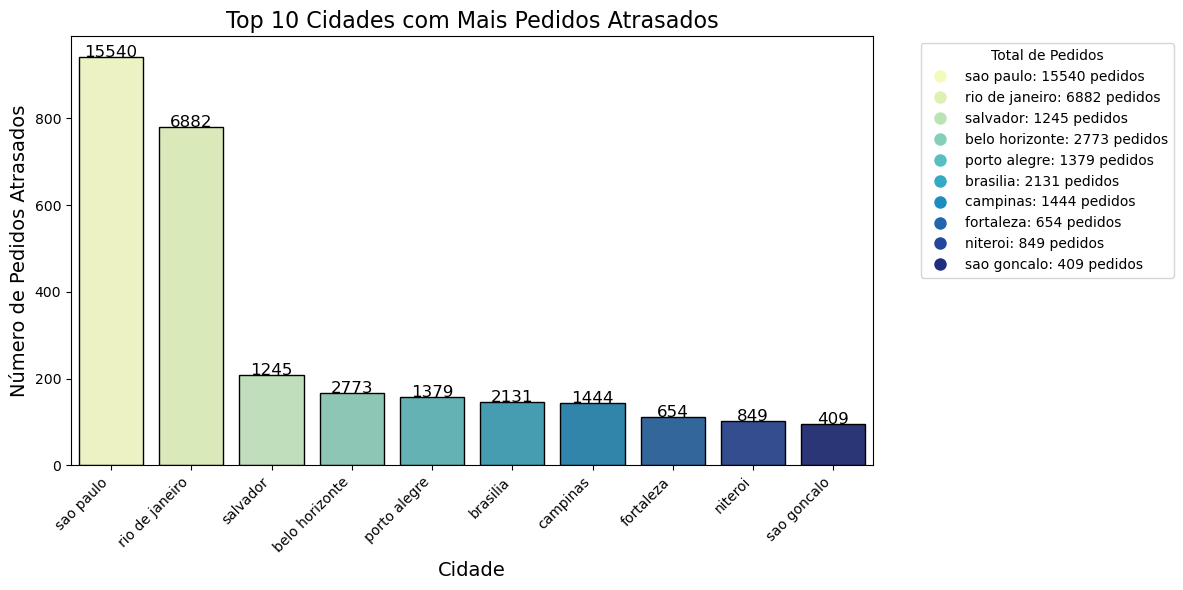

In [313]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.lines import Line2D

# Contar o número total de pedidos por cidade
pedidos_por_cidade = customer_orders['customer_city'].value_counts()

# Contar os pedidos atrasados por cidade
atrasados = customer_orders[customer_orders['atrasado'] == True]
pedidos_atrasados_por_cidade = atrasados['customer_city'].value_counts()

# Combinar as duas informações: total de pedidos e pedidos atrasados
pedidos_completo = pd.DataFrame({
    'total_pedidos': pedidos_por_cidade,
    'pedidos_atrasados': pedidos_atrasados_por_cidade

                        
}).fillna(0)  # Preenche valores ausentes com 0 (caso alguma cidade não tenha pedidos atrasados)

# Selecionar as 10 cidades com mais pedidos atrasados
top_10_cidades_atrasados = pedidos_completo['pedidos_atrasados'].sort_values(ascending=False).head(10)

# Exibir os resultados
print(pedidos_completo.head(10))

# Criar gráfico de barras para a quantidade de pedidos atrasados e totais por cidade
plt.figure(figsize=(12, 6))

# Definir a cor com base no número total de pedidos
palette = sns.color_palette("YlGnBu", len(top_10_cidades_atrasados))  # Paleta para cores do número total de pedidos
sns.barplot(x=top_10_cidades_atrasados.index, 
            y=top_10_cidades_atrasados.values, 
            palette=palette,
            edgecolor="black")

# Personalizar o gráfico
plt.xlabel('Cidade', fontsize=14)
plt.ylabel('Número de Pedidos Atrasados', fontsize=14)
plt.title('Top 10 Cidades com Mais Pedidos Atrasados', fontsize=16)
plt.xticks(rotation=45, ha='right')

# Exibir quantidade total de pedidos em cada barra
for i in range(len(top_10_cidades_atrasados)):
    plt.text(i, top_10_cidades_atrasados.values[i] + 0.1, 
             f"{pedidos_completo.loc[top_10_cidades_atrasados.index[i], 'total_pedidos']}", 
             ha="center", fontsize=12)

# Adicionar a legenda de cores apenas para as 10 cidades
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[i], markersize=10, 
                  label=f'{top_10_cidades_atrasados.index[i]}: {pedidos_completo.loc[top_10_cidades_atrasados.index[i], "total_pedidos"]} pedidos') 
           for i in range(len(palette))]
plt.legend(handles=handles, title="Total de Pedidos", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


                total_pedidos  pedidos_atrasados
customer_state                                  
AC                         81                  3
AL                        413                 95
AM                        148                  6
AP                         68                  3
BA                       3380                457
CE                       1336                196
DF                       2140                147
ES                       2033                244
GO                       2020                160
MA                        747                141


/var/folders/mt/2h29lwb91pv7n5c03zf4q5hc0000gp/T/ipykernel_17393/1457930888.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_state_atrasados.index,


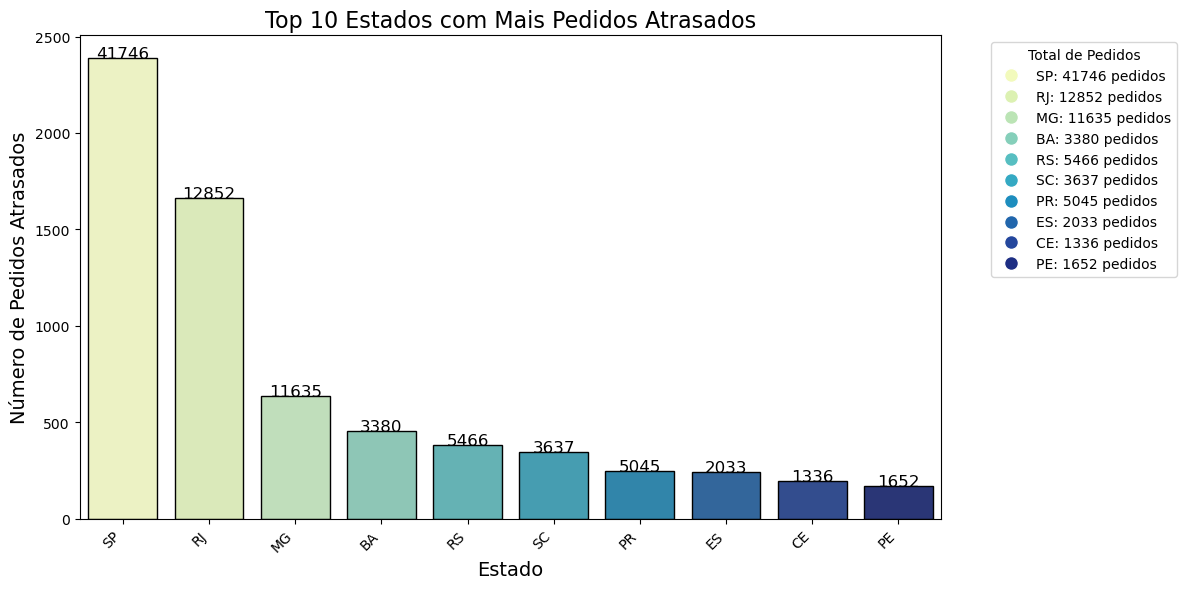

In [401]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.lines import Line2D

# Contar o número total de pedidos por estado
pedidos_por_state = customer_orders['customer_state'].value_counts()

# Contar os pedidos atrasados por cidade
atrasados = customer_orders[customer_orders['atrasado'] == True]
pedidos_atrasados_por_state = atrasados['customer_state'].value_counts()

# Combinar as duas informações: total de pedidos e pedidos atrasados
pedidos_completo = pd.DataFrame({
    'total_pedidos': pedidos_por_state,
    'pedidos_atrasados': pedidos_atrasados_por_state

                        
}).fillna(0)  # Preenche valores ausentes com 0 (caso alguma cidade não tenha pedidos atrasados)

# Selecionar as 10 cidades com mais pedidos atrasados
top_10_state_atrasados = pedidos_completo['pedidos_atrasados'].sort_values(ascending=False).head(10)

# Exibir os resultados
print(pedidos_completo.head(10))

# Criar gráfico de barras para a quantidade de pedidos atrasados e totais por cidade
plt.figure(figsize=(12, 6))

# Definir a cor com base no número total de pedidos
palette = sns.color_palette("YlGnBu", len(top_10_state_atrasados))  # Paleta para cores do número total de pedidos
sns.barplot(x=top_10_state_atrasados.index, 
            y=top_10_state_atrasados.values, 
              palette=palette,
            edgecolor="black")
            

# Personalizar o gráfico
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Número de Pedidos Atrasados', fontsize=14)
plt.title('Top 10 Estados com Mais Pedidos Atrasados', fontsize=16)
plt.xticks(rotation=45, ha='right')

# Exibir quantidade total de pedidos em cada barra
for i in range(len(top_10_state_atrasados)):
    plt.text(i, top_10_state_atrasados.values[i] + 0.1, 
             f"{pedidos_completo.loc[top_10_state_atrasados.index[i], 'total_pedidos']}", 
             ha="center", fontsize=12)

# Adicionar a legenda de cores apenas para as 10 cidades
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[i], markersize=10, 
                  label=f'{top_10_state_atrasados.index[i]}: {pedidos_completo.loc[top_10_state_atrasados.index[i], "total_pedidos"]} pedidos') 
           for i in range(len(palette))]
plt.legend(handles=handles, title="Total de Pedidos", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [329]:
# Carregar os datasets
orders = pd.read_csv("/Users/victorsabino36/Downloads/archive/olist_orders_dataset.csv")
order_items = pd.read_csv("/Users/victorsabino36/Downloads/archive/olist_order_items_dataset.csv")
products = pd.read_csv("/Users/victorsabino36/Downloads/archive/olist_products_dataset.csv")
product_translations = pd.read_csv("/Users/victorsabino36/Downloads/archive/product_category_name_translation.csv")

In [331]:
# Unir datasets
# 1. Juntar 'orders' e 'order_items' usando 'order_id'
merged_orders_items = pd.merge(order_items, orders, on="order_id", how="inner")

# 2. Juntar 'merged_orders_items' com 'products' usando 'product_id'
merged_orders_products = pd.merge(merged_orders_items, products, on="product_id", how="inner")

# 3. Juntar 'merged_orders_products' com 'product_translations' usando 'product_category_name'
final_dataset = pd.merge(
    merged_orders_products, 
    product_translations, 
    on="product_category_name", 
    how="left"
)

# Visualizar as primeiras linhas do dataset final
print("Primeiras linhas do dataset final:")
print(final_dataset.head())


Primeiras linhas do dataset final:
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  \
0  2017-09-19 09:45:35   58.90          13.29   
1  2017-05-03 11:05:13  239.90          19.93   
2  2018-01-18 14:48:30  199.00          17.87   
3  20

As 10 categorias mais vendidas:
product_category_name
cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: order_id, dtype: int64


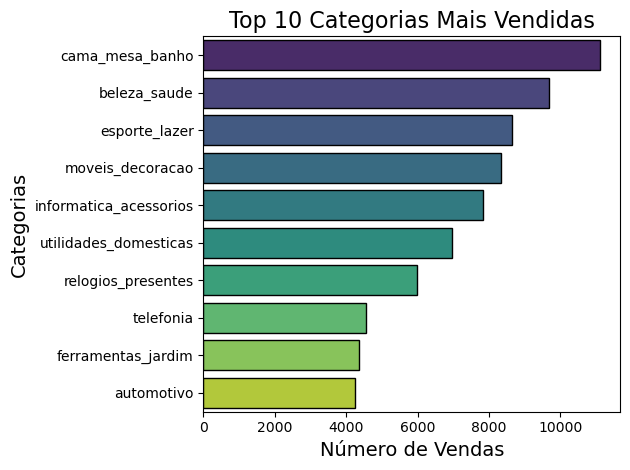

In [349]:
# Contar o número de vendas por categoria
categorias_mais_vendidas = final_dataset.groupby("product_category_name")["order_id"].count()

# Ordenar as categorias em ordem decrescente e selecionar as 10 mais vendidas
top_10_categorias = categorias_mais_vendidas.sort_values(ascending=False).head(10)

# Exibir as 10 categorias mais vendidas
print("As 10 categorias mais vendidas:")
print(top_10_categorias)

sns.barplot(
    x=top_10_categorias.values,
    y=top_10_categorias.index,
    hue=top_10_categorias.index,  # Assign the index for coloring
    palette="viridis",
    edgecolor="black",
    legend=False
)
# Personalizar o gráfico
plt.title('Top 10 Categorias Mais Vendidas', fontsize=16)
plt.xlabel('Número de Vendas', fontsize=14)
plt.ylabel('Categorias', fontsize=14)
plt.legend([], [], frameon=False)  # Remove a legenda automática
plt.tight_layout()

Top 10 Categorias com Maior Faturamento:
     product_category_name  total_vendas  faturamento_total  ticket_medio
11            beleza_saude         11081         1347468.49    121.601705
66      relogios_presentes          6594         1259634.58    191.027386
13         cama_mesa_banho         13665         1228795.46     89.922829
44  informatica_acessorios          9874         1135454.64    114.994393
32           esporte_lazer          9932         1082435.42    108.984638
54        moveis_decoracao         11540          929520.95     80.547743
72   utilidades_domesticas          9051          750233.73     82.889596
8               automotivo          4881          662861.88    135.804524
26              cool_stuff          4077          659590.61    161.783324
40      ferramentas_jardim          5874          584155.02     99.447569


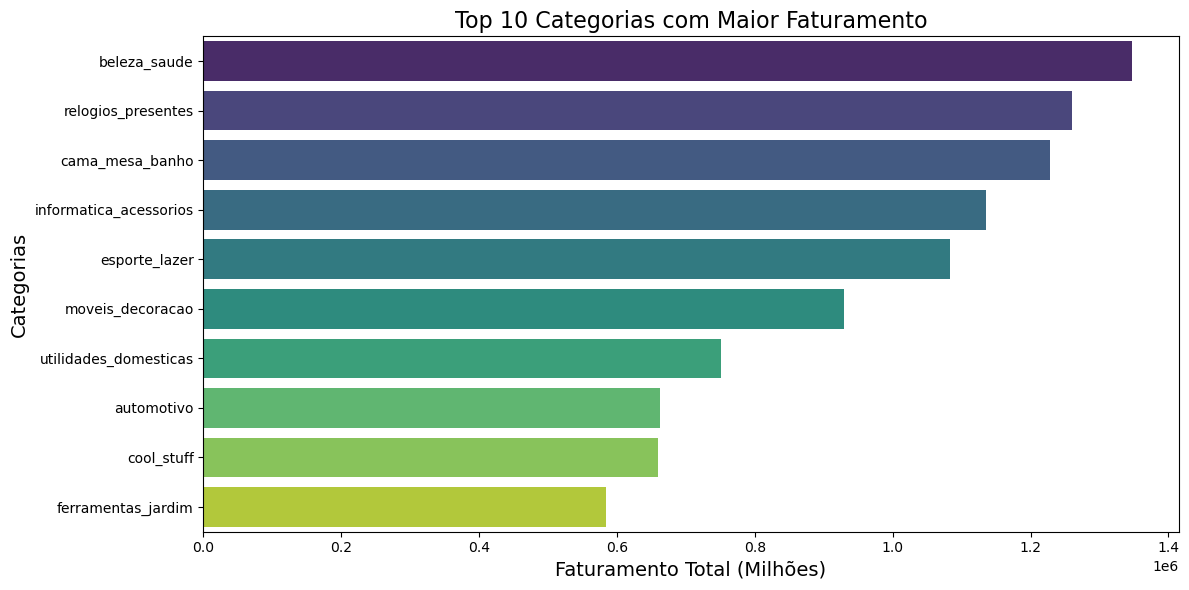

In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcular o faturamento de cada produto
final_dataset['faturamento'] = final_dataset['price'] * final_dataset['order_item_id']

# 2. Agrupar por categoria de produto e calcular a quantidade total de vendas, o faturamento total e o ticket médio
categoria_faturamento = final_dataset.groupby('product_category_name').agg(
    total_vendas=('order_item_id', 'sum'),
    faturamento_total=('faturamento', 'sum')
).reset_index()

# 3. Calcular o ticket médio (faturamento total / total de vendas)
categoria_faturamento['ticket_medio'] = categoria_faturamento['faturamento_total'] / categoria_faturamento['total_vendas']

# 4. Selecionar as 10 categorias com maior faturamento
top_10_categorias = categoria_faturamento.sort_values(by='faturamento_total', ascending=False).head(10)

# 5. Exibir as 10 categorias mais rentáveis
print("Top 10 Categorias com Maior Faturamento:")
print(top_10_categorias)

# 6. Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    x='faturamento_total',
    y='product_category_name',
    data=top_10_categorias,
    palette="viridis",
    hue='product_category_name' 
)

# 7. Personalizar o gráfico
plt.title('Top 10 Categorias com Maior Faturamento', fontsize=16)
plt.xlabel('Faturamento Total (Milhões)', fontsize=14)
plt.ylabel('Categorias', fontsize=14)
plt.xticks(rotation=0)  # Não é necessário rotacionar para o eixo Y
plt.tight_layout()
plt.show()


In [383]:
import pandas as pd

reviews = pd.read_csv('/Users/victorsabino36/Downloads/archive/olist_order_reviews_dataset.csv')
orders = pd.read_csv('/Users/victorsabino36/Downloads/archive/olist_orders_dataset.csv')
delivery = pd.read_csv('/Users/victorsabino36/Downloads/archive/tabela_delivery_duration.csv')
items = pd.read_csv('/Users/victorsabino36/Downloads/archive/olist_order_items_dataset.csv')


In [385]:
combined = reviews.merge(orders, on='order_id', how='inner')
combined = combined.merge(delivery, on='order_id', how='inner')
combined = combined.merge(items, on='order_id', how='inner')



In [387]:
# Contar a quantidade de cada opção de avaliação
quantidade_por_score = combined['review_score'].value_counts().sort_index()

# Exibir os resultados
print(quantidade_por_score)


review_score
1    14235
2     3874
3     9423
4    21315
5    63525
Name: count, dtype: int64


   review_score  delivery_duration
0             1          19.116632
1             2          15.337838
2             3          13.581197
3             4          11.752644
4             5          10.191464


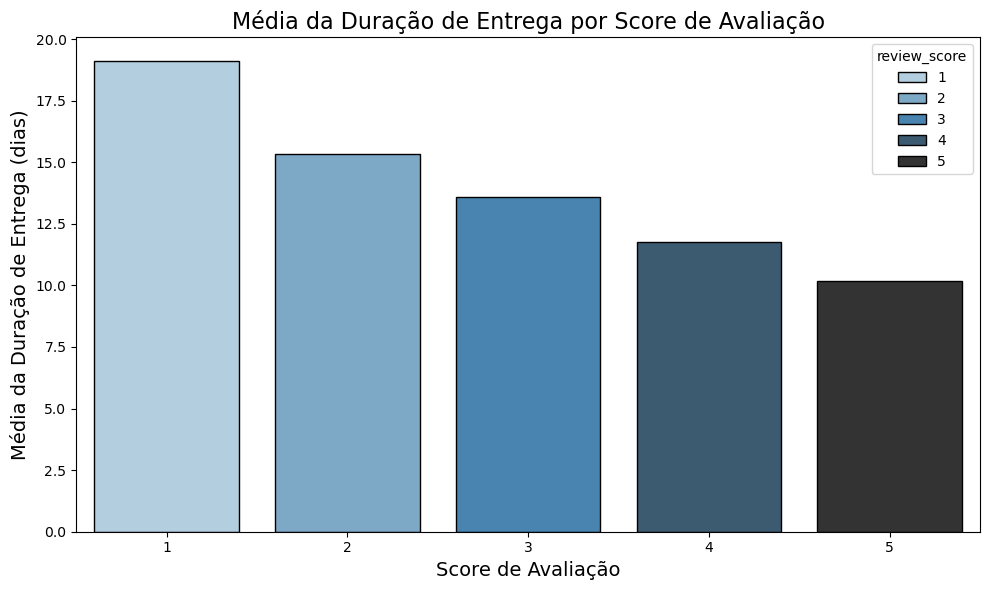

In [411]:

# Calcula a duração da entrega em dias
combined['delivery_duration'] = (combined['order_delivered_customer_date_y'] - combined['order_purchase_timestamp_x']).dt.days

# Calcula a média da duração de entrega agrupada por review_score
entrega_por_score = combined.groupby('review_score')['delivery_duration'].mean().reset_index()

# Exibe o resultado
print(entrega_por_score)

# Cria o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    x='review_score',
    y='delivery_duration',
    data=entrega_por_score,
    hue='review_score',
    palette='Blues_d',
    edgecolor='black'
)

# Personalização do gráfico
plt.title('Média da Duração de Entrega por Score de Avaliação', fontsize=16)
plt.xlabel('Score de Avaliação', fontsize=14)
plt.ylabel('Média da Duração de Entrega (dias)', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()

# Exibe o gráfico
plt.show()
